# Clustering

## 1. K-Means

Import libraries

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Ambil dataset, pakai random

In [4]:
np.random.seed()

In [5]:
X, y = make_blobs(n_samples = 500, centers = [[4,4],[-2,1],[2,3],[1,1]], cluster_std=0.9)

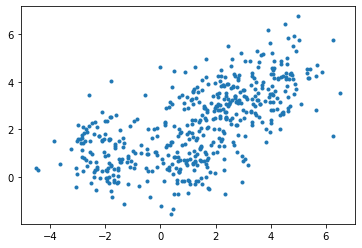

In [7]:
plt.scatter(X[:, 0],X[:,1], marker='.')

Ambil dataset, pake data real

In [8]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2022-03-30 08:02:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: 'Cust_Segmentation.csv'

     0K .......... .......... .......... ...                  100%  107K=0,3s

2022-03-30 08:02:24 (107 KB/s) - 'Cust_Segmentation.csv' saved [34276/34276]



In [9]:
import pandas as pd
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Hapus Address

In [10]:
df_drop = df.drop('Address', axis = 1)

In [11]:
df_drop.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalisasi data, panggil scaler

In [12]:
from sklearn.preprocessing import StandardScaler
X = df_drop.values[:,1:]
X = np.nan_to_num(X)
Clust_dataSet = StandardScaler().fit_transform(X)
Clust_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Mulai pengelompokan/clustering

Tentukan punya K atau cluter berapa 

In [15]:
clusterNum = 3
k_means = KMeans (init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

Tambah satu kolom dengan nama Clustering

In [16]:
df_drop["Clustering"] = labels
df_drop.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clustering
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [17]:
df_drop.groupby('Clustering').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clustering,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


Lihat distribusi berdasarkan umur dan pendapatan

<ipython-input-18-7359974ee352>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float), alpha=0.5)


<function matplotlib.pyplot.show(close=None, block=None)>

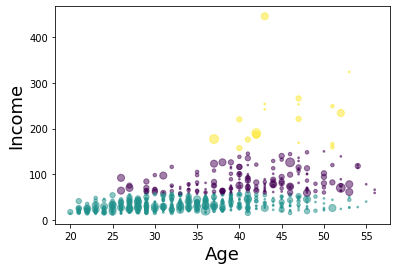

In [18]:
area = np.pi * (X[:,1])**2
plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.show

## 2. Hierarchical Clustering

Pakai pendekatan aglomeratif

Ambil dataset, dataframe

In [19]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2022-03-30 08:22:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: 'cars_clus.csv'

     0K .......... .......                                    100%  121K=0,1s

2022-03-30 08:22:41 (121 KB/s) - 'cars_clus.csv' saved [17774/17774]



Cara lain ambil dataframe

In [20]:
namafile = 'cars_clus.csv'

#baca dataframe
dataHC = pd.read_csv(namafile)
print("Banyak baris dan kolom", dataHC.shape)
dataHC.head()

Banyak baris dan kolom (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Cleaning data, untuk menghilangkan data yang terdapat Nan

In [23]:
print("Banyaknya data sebelum dibersihkan: ", dataHC.size)
dataHC[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']] = dataHC[['sales','resale','type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg','lnsales']].apply(pd.to_numeric, errors='coerce')
dataHC = dataHC.dropna()
dataHC = dataHC.reset_index(drop=True)
print("Banyaknya data setelah dibersihkan: ", dataHC.size)
dataHC.head()

Banyaknya data sebelum dibersihkan:  2544
Banyaknya data setelah dibersihkan:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [24]:
fitur = dataHC[['engine_s','width','length','fuel_cap','mpg']]

Normalisasikan, fitkan

In [25]:
from sklearn.preprocessing import MinMaxScaler
x = fitur.values
min_max_scaler = MinMaxScaler()
fitur_minmax = min_max_scaler.fit_transform(x)
fitur_minmax [0:5]

array([[0.11428571, 0.28143713, 0.30625832, 0.13364055, 0.43333333],
       [0.31428571, 0.46107784, 0.5792277 , 0.31797235, 0.33333333],
       [0.35714286, 0.52694611, 0.62849534, 0.35483871, 0.23333333],
       [0.11428571, 0.33532934, 0.38082557, 0.28110599, 0.4       ],
       [0.25714286, 0.80838323, 0.56724368, 0.37788018, 0.23333333]])

In [30]:
import scipy
leng = fitur_minmax.shape[0]
D = np.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(fitur_minmax[i], fitur_minmax[j])

In [29]:
import pylab
import scipy.cluster.hierarchy as sch
Z = sch.linkage(D, 'complete')

<ipython-input-29-9dbd2bb53a3f>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(D, 'complete')


In [31]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

array([6, 3, 3, 5, 4, 4, 5, 3, 3, 3, 4, 3, 4, 4, 3, 5, 5, 3, 3, 3, 4, 6,
       7, 5, 5, 4, 5, 4, 5, 5, 5, 2, 2, 2, 2, 4, 4, 6, 3, 5, 3, 1, 3, 1,
       1, 3, 2, 6, 5, 5, 3, 4, 6, 5, 5, 3, 6, 5, 3, 3, 3, 4, 4, 1, 6, 5,
       5, 3, 3, 4, 5, 5, 5, 3, 1, 3, 4, 5, 3, 4, 4, 6, 5, 3, 4, 3, 5, 4,
       5, 4, 5, 5, 4, 5, 5, 3, 3, 3, 5, 5, 5, 6, 6, 6, 6, 5, 3, 6, 5, 6,
       5, 1, 6, 5, 5, 6, 6], dtype=int32)

In [32]:
from scipy.cluster.hierarchy import fcluster
k = 3
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

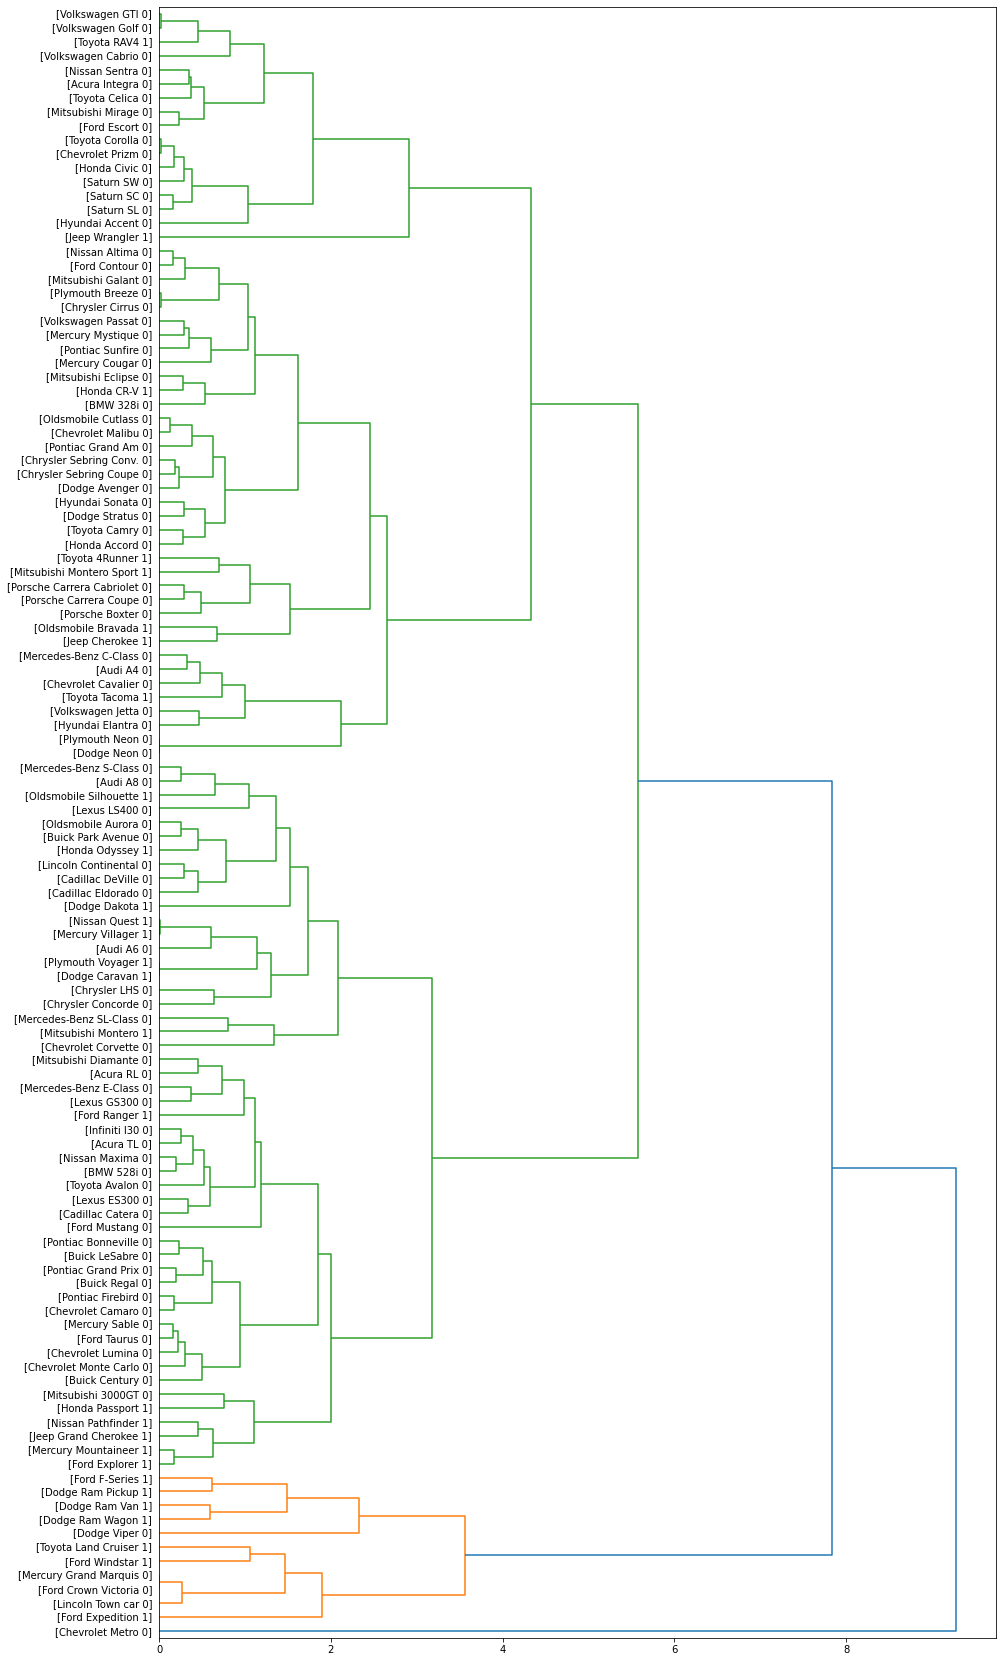

In [37]:
gambar = pylab.figure(figsize=(15,30))
def llf(id):
    return '[%s %s %s]' % (dataHC['manufact'][id],dataHC['model'][id], int(float(dataHC['type'][id])))
    
gambar_dendro = sch.dendrogram(Z, leaf_label_func=llf, leaf_font_size=10, orientation='right')

## 3. DBSCAN

install basemap

Code untuk DBSCAN berbeda file, minat PC

### Alfendio Aif Faudisyah - 672019222 - Metodologi Data Science